# THREDDS Servier Inventory for LOCA2 Aggregated Regions

In [1]:
####################################################
#
# Libraries
#

print("====")

print("BEGIN THREDDS INVENTORY SCRIPT")

print("----")

print("Libraries")

import time               as time
t_00 = time.time()
t0 = time.time()
import numpy              as np
import cartopy.crs        as ccrs
import cartopy.feature    as cfeature
import matplotlib.patches as mpatches
import matplotlib.pyplot  as plt
import pandas             as pd
import shapely            as shapely
import os                 as os
import pyproj             as proj
import geopandas          as gp
import socket             as socket

from   siphon.catalog import TDSCatalog

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

====
BEGIN THREDDS INVENTORY SCRIPT
----
Libraries
Timing = 1.8629608154296875 s
----


## Creating SD Mines Branded Colors

In [2]:
####################################################
#
# Mines Colors and Fonts
#

print("Mines Colors and Fonts for Local Branding")

t0 = time.time()

Mines_Blue = "#002554"


plt.rcParams.update({'text.color'      : Mines_Blue,
                     'axes.labelcolor' : Mines_Blue,
					 'axes.edgecolor'  : Mines_Blue,
					 'xtick.color'     : Mines_Blue,
					 'ytick.color'     : Mines_Blue,
                     'font.family'     : "Open Sans"})

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Mines Colors and Fonts for Local Branding
Timing = 0.00011110305786132812 s
----


## Determine What Machine we are working on.

In [3]:
####################################################
#
# Kyrill vs Mandrenke
#

print("Begin Script: Identify Machine")

t0 = time.time()

print(socket.gethostname())

myhostname = socket.gethostname()

if ("mandrenke" in socket.gethostname()): # Mandrenke
    target_dir  = "/Users/wjc/GitHub/LOCA_Percentile_Processing/"
    display_img = True
else:  # Kyrill
    target_dir = "/var/www/html/wjc/eduresources/"
    display_img = False

print(target_dir)

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Begin Script: Identify Machine
mandrenke.local
/Users/wjc/GitHub/LOCA_Percentile_Processing/
Timing = 0.00036025047302246094 s
----


## Pulling Inventories from the THREDDS Server

In [4]:
####################################################
#
# Pulling Available RData Inventories from THREDDS Server 
#

print("Pulling Inventory from THREDDS Server")

t0 = time.time()

dir_hucs = "http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/LOCA2/Specific_Regional_Aggregate_Sets/USGS_HUC08_Basins/R_Annual_Files/catalog.xml"
dir_cdiv = "http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/LOCA2/Specific_Regional_Aggregate_Sets/NCEI_Climate_Divisions/R_Annual_Files/catalog.xml"

dir_hucs_csv  = "http://kyrill.ias.sdsmt.edu/wjc/eduresources/USGS_HUC08_LUT.csv"
dir_cdiv_csv  = "http://kyrill.ias.sdsmt.edu/wjc/eduresources/NCEI_nClimDiv_LUT.csv"
dir_loca2_csv = "http://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/LOCA2/LOCA2_Model_Member_Available_List.csv"

pre_hucs = "LOCA2_V1_HUC08_ANNUAL_"
pre_cdiv = "LOCA2_V1_nCLIMDIV_ANNUAL_"

cat_hucs = TDSCatalog(dir_hucs).datasets
cat_cdiv = TDSCatalog(dir_cdiv).datasets

available_hucs = []
for file_huc in cat_hucs:
    available_hucs.append(file_huc.replace(pre_hucs, "").replace(".RData", ""))
    
available_cdiv = []
for file_cdiv in cat_cdiv:
    available_cdiv.append(file_cdiv.replace(pre_cdiv, "").replace(".RData", ""))

table_hucs  = pd.read_csv(filepath_or_buffer = dir_hucs_csv)
table_cdiv  = pd.read_csv(filepath_or_buffer = dir_cdiv_csv)

available_hucs = np.array(available_hucs, dtype=np.int32)
available_cdiv = np.array(available_cdiv, dtype=np.int32)

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Pulling Inventory from THREDDS Server
Timing = 4.050390720367432 s
----


## Creating Table of Ensemble Members

In [5]:
####################################################
#
# Creating List of Ensemble Members
#

print("Creating List of Ensemble Members")

t0 = time.time()

table_loca2 = pd.read_csv(filepath_or_buffer = dir_loca2_csv)

table_loca2 = table_loca2[(table_loca2[ "Rank"] ==               1)] 
table_loca2 = table_loca2[(table_loca2["Model"] != "MPI-ESM1-2-LR")]

table_loca2 = table_loca2[["Model",
                           "Member",
                           "NetError",
                           "historical",
                           "ssp245",
                           "ssp370",
                           "ssp585"]]

table_loca2["NetError"] = table_loca2["NetError"].values.round(2)

table_loca2             = table_loca2.rename(columns = {"historical":"Historical",
                                                            "ssp245":"SSP2-4.5"  ,
                                                            "ssp370":"SSP3-7.0"  ,
                                                            "ssp585":"SSP5-8.5"  })
table_loca2.to_csv(path_or_buf = target_dir + "LOCA2_Ens_Members.csv", index=False)

print(target_dir + "LOCA2_Ens_Members.csv")

os.system('csvtotable --caption "Included LOCA2 Ensemble Members" --overwrite ' +  target_dir + "LOCA2_Ens_Members.csv " + target_dir + "LOCA2_Ens_Members.html")

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Creating List of Ensemble Members
/Users/wjc/GitHub/LOCA_Percentile_Processing/LOCA2_Ens_Members.csv
File converted successfully: /Users/wjc/GitHub/LOCA_Percentile_Processing/LOCA2_Ens_Members.html
Timing = 1.3793952465057373 s
----


## Cleaning the HUC-08 Inventories

In [18]:
####################################################
#
# Cleaning Available HUC Inventory
#

print("Cleaning USGS HUC 08 Inventory")

t0 = time.time()

table_huc = table_hucs[table_hucs["huc08"].isin(available_hucs)]
display(table_huc)
table_huc = table_huc[['huc08',
                       'huc08_name', 
                       'huc06_name', 
                       'huc04_name', 
                       'huc02_name']].rename(columns = {"huc08"     : "HUC-08",
                                                        "huc08_name": "BASIN NAME",
                                                        "huc06_name": "HUC-06 BASIN",
                                                        "huc04_name": "HUC-04 BASIN",
                                                        "huc02_name": "HUC-02 REGION"})

table_huc["HUC-08"] = [str(x).zfill(8)   for x in table_huc["HUC-08"].values]
table_huc = table_huc.sort_values("HUC-08")
table_huc.to_csv(path_or_buf = target_dir + "HUC_table_avail.csv", index=False)
print(target_dir + "HUC_table_avail.csv")


if (display_img) :
    display(table_huc)

os.system('csvtotable --caption "Available HUC-08 Files" --overwrite ' +  target_dir + "HUC_table_avail.csv " + target_dir + "HUC_table_avail.html")

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Cleaning USGS HUC 08 Inventory


,huc08,huc06,huc04,huc02,huc08_name,huc08_state,huc06_name,huc04_name,huc02_name,huc08_mean_mass_content_of_water_in_soil,huc08_standard_deviation_mass_content_of_water_in_soil,huc08_area_for_mass_content_of_water_in_soil,huc08_mean_surface_elevation,huc08_standard_deviation_surface_elevation,huc08_area_for_surface_elevation,huc08_mean_longitude,huc08_mean_latitude
144,3030006,30300,303,3,Black,NC,Cape Fear,Cape Fear,South Atlantic-Gulf Region,183.01537,22.886692,8.887472e+09,33.528250,18.402496,8.887472e+09,-78.447174,34.948130
145,3030007,30300,303,3,Northeast Cape Fear,NC,Cape Fear,Cape Fear,South Atlantic-Gulf Region,176.92598,38.918200,1.216975e+10,19.158417,12.865921,1.216975e+10,-77.886470,34.753403
147,3020202,30202,302,3,Middle Neuse,NC,Neuse,Neuse-Pamlico,South Atlantic-Gulf Region,204.38394,32.608356,4.738910e+09,13.183358,8.374281,4.738910e+09,-77.400050,35.331120
148,3020103,30201,302,3,Lower Tar,NC,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region,200.13954,16.668612,4.869027e+09,15.961909,8.141638,4.869027e+09,-77.398050,35.788155
149,3020201,30202,302,3,Upper Neuse,NC,Neuse,Neuse-Pamlico,South Atlantic-Gulf Region,191.57199,17.396338,1.098552e+10,99.277920,47.477528,1.098552e+10,-78.613820,35.851425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,14080201,140802,1408,14,Lower San Juan-Four Corners,"AZ,CO,NM,UT",Lower San Juan,San Juan,Upper Colorado Region,128.52370,30.102920,9.161924e+09,1659.433100,287.824280,9.161924e+09,-109.416030,37.318540
1654,14080202,140802,1408,14,McElmo,"CO,UT",Lower San Juan,San Juan,Upper Colorado Region,145.32368,41.469360,4.462996e+09,1871.262700,237.626430,4.462996e+09,-108.746880,37.361927
1658,14080203,140802,1408,14,Montezuma,"CO,UT",Lower San Juan,San Juan,Upper Colorado Region,146.81891,31.514212,7.970336e+09,1896.104200,264.678040,7.970336e+09,-109.134026,37.663017
1661,14080204,140802,1408,14,Chinle,"AZ,NM,UT",Lower San Juan,San Juan,Upper Colorado Region,123.97732,33.011730,1.915616e+10,1828.573400,265.121430,1.915616e+10,-109.547420,36.450672


/Users/wjc/GitHub/LOCA_Percentile_Processing/HUC_table_avail.csv


,HUC-08,BASIN NAME,HUC-06 BASIN,HUC-04 BASIN,HUC-02 REGION
253,03020101,Upper Tar,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region
254,03020102,Fishing,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region
148,03020103,Lower Tar,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region
255,03020104,Pamlico,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region
200,03020105,Pamlico Sound,Pamlico,Neuse-Pamlico,South Atlantic-Gulf Region
...,...,...,...,...,...
1649,14080201,Lower San Juan-Four Corners,Lower San Juan,San Juan,Upper Colorado Region
1654,14080202,McElmo,Lower San Juan,San Juan,Upper Colorado Region
1658,14080203,Montezuma,Lower San Juan,San Juan,Upper Colorado Region
1661,14080204,Chinle,Lower San Juan,San Juan,Upper Colorado Region


File converted successfully: /Users/wjc/GitHub/LOCA_Percentile_Processing/HUC_table_avail.html
Timing = 0.4755260944366455 s
----


## Cleaning the Climate Division Inventories

In [19]:
####################################################
#
# Cleaning Available ClimDiv Inventory
#

print("Cleaning NCEI ClimDiv Inventory")

t0 = time.time()

table_div = table_cdiv[table_cdiv["climdiv"].isin(available_cdiv)][["climdiv",
                                                                    "climdiv_name",
                                                                    "climdiv_state_name"]]

table_div["climdiv"] = [str(x).zfill(4) for x in table_div["climdiv"].values]

table_div  = table_div.rename(columns = {"climdiv":"DIVISION",
                                         "climdiv_name":"NAME",
                                          "climdiv_state_name":"STATE"}).sort_values("DIVISION")

table_div.to_csv(path_or_buf = target_dir + "ClimDiv_table_avail.csv", index=False)

print(target_dir + "ClimDiv_table_avail.csv")

if (display_img) :
    display(table_div)

os.system('csvtotable --caption "Available ClimDiv Files" --overwrite ' +  target_dir + "ClimDiv_table_avail.csv " + target_dir + "ClimDiv_table_avail.html")

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Cleaning NCEI ClimDiv Inventory
/Users/wjc/GitHub/LOCA_Percentile_Processing/ClimDiv_table_avail.csv


,DIVISION,NAME,STATE
0,0101,Northern Valley,Alabama
1,0102,Appalachian Mountain,Alabama
2,0103,Upper Plains,Alabama
3,0104,Eastern Valley,Alabama
4,0105,Piedmont Plateau,Alabama
...,...,...,...
339,4806,Belle Fourche Drainage,Wyoming
340,4807,Cheyenne & Niobrara Drainage,Wyoming
341,4808,Lower Platte,Wyoming
342,4809,Wind River,Wyoming


File converted successfully: /Users/wjc/GitHub/LOCA_Percentile_Processing/ClimDiv_table_avail.html
Timing = 0.6603438854217529 s
----


## Pulling GeoJSON Polygon Files

In [26]:
####################################################
#
# Cleaning Available ClimDiv Inventory
#

print("Read the GeoJSON Polygon Files")

t0 = time.time()

shp_hucs = gp.read_file("GeoJSON_Files/CONUS_USGS_HUC-08.geojson")
shp_cdiv = gp.read_file("GeoJSON_Files/CONUS_NCEI_Climate_Divisions.geojson")

print("Initial Polygon Elements")
print("       HUC08:RAW:",len(shp_hucs), len(shp_hucs.get_coordinates()))
print("     CLIMDIV:RAW:",len(shp_cdiv), len(shp_cdiv.get_coordinates()))

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")


display(shp_hucs)
#
####################################################

Read the GeoJSON Polygon Files
Initial Polygon Elements
       HUC08:RAW: 2193 26538431
     CLIMDIV:RAW: 344 3169875
Timing = 29.14903712272644 s
----


,huc8,geometry
0,10090201,"POLYGON ((-107.06413 44.15078, -107.06297 44.1..."
1,10090202,"POLYGON ((-106.03158 44.86487, -106.03139 44.8..."
2,10090205,"POLYGON ((-106.26834 44.57113, -106.26739 44.5..."
3,10120107,"POLYGON ((-104.33155 44.18989, -104.33096 44.1..."
4,10060007,"POLYGON ((-104.36247 49.24502, -104.36162 49.2..."
...,...,...
2188,4050002,"POLYGON ((-86.24284 43.05799, -86.24262 43.057..."
2189,4050006,"POLYGON ((-85.18068 43.55682, -85.18061 43.556..."
2190,4040001,"POLYGON ((-86.52387 42.02653, -86.52408 42.026..."
2191,4010101,"POLYGON ((-89.25818 48.35771, -89.25779 48.357..."


## Retain only Polygons Associated with an Available RData File

In [21]:
####################################################
#
# Retain only Polygons Associated with an Available RData File
#

print("Retain only Polygons Associated with an Available RData File")

t0 = time.time()

shp_cdiv = shp_cdiv[shp_cdiv["CLIMDIV"].isin(available_cdiv)]
shp_hucs = shp_hucs[shp_hucs[  "huc8" ].isin(available_hucs)]

print("  Available Polygon Elements")
print("       HUC08:CUT:",len(shp_hucs), len(shp_hucs.get_coordinates()))
print("     CLIMDIV:CUT:",len(shp_cdiv), len(shp_cdiv.get_coordinates()))

#
# Plot Climate Divisions if in a Jupyter Session
#

if (display_img) :
    display(shp_cdiv)
    display(shp_hucs)

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Retain only Polygons Associated with an Available RData File
  Available Polygon Elements
       HUC08:CUT: 351 4205302
     CLIMDIV:CUT: 344 3169875


,CLIMDIV,geometry
0,101,"POLYGON ((-88.05783 35.00647, -88.05149 35.006..."
1,102,"POLYGON ((-86.25819 34.99064, -86.25521 34.990..."
2,103,"POLYGON ((-88.0181 34.31526, -88.01717 34.3152..."
3,104,"POLYGON ((-85.51167 34.51693, -85.51144 34.515..."
4,105,"POLYGON ((-85.40764 33.96421, -85.40541 33.964..."
...,...,...
339,4806,"POLYGON ((-104.19334 44.99802, -104.172 44.997..."
340,4807,"POLYGON ((-104.28338 44.15419, -104.27634 44.1..."
341,4808,"POLYGON ((-106.52965 43.18177, -106.52644 43.1..."
342,4809,"POLYGON ((-109.51581 43.93993, -109.50484 43.9..."


,huc8,geometry
0,10090201,"POLYGON ((-107.06413 44.15078, -107.06297 44.1..."
1,10090202,"POLYGON ((-106.03158 44.86487, -106.03139 44.8..."
2,10090205,"POLYGON ((-106.26834 44.57113, -106.26739 44.5..."
3,10120107,"POLYGON ((-104.33155 44.18989, -104.33096 44.1..."
4,10060007,"POLYGON ((-104.36247 49.24502, -104.36162 49.2..."
...,...,...
2052,4300103,"POLYGON ((-73.07006 44.59122, -73.06981 44.590..."
2053,4300202,"POLYGON ((-71.19162 46.11583, -71.1917 46.1145..."
2069,4300201,"POLYGON ((-73.40306 45.39731, -73.40289 45.395..."
2093,4300102,"POLYGON ((-73.31087 44.21875, -73.30956 44.218..."


Timing = 0.13001298904418945 s
----


## Dissolve Available Polygons

In [22]:
####################################################
#
# Dissolve Available Polygons
#

print("Dissolve All Available Polygons")

t0 = time.time()

shp_cdiv = shp_cdiv.assign(CLIMDIV=1) 
shp_hucs = shp_hucs.assign(   huc8=1) 

shp_cdivD = shp_cdiv.dissolve(by = "CLIMDIV")
shp_hucsD = shp_hucs.dissolve(by =    "huc8")

print("  Available Polygon Elements")
print("       HUC08:DIS:",len(shp_hucsD), len(shp_hucs.get_coordinates()))
print("     CLIMDIV:DIS:",len(shp_cdivD), len(shp_cdiv.get_coordinates()))

t1 = time.time()

print("Timing =", (t1-t0), "s")

print("----")

#
####################################################

Dissolve All Available Polygons
  Available Polygon Elements
       HUC08:DIS: 1 4205302
     CLIMDIV:DIS: 1 3169875
Timing = 26.931511163711548 s
----


## Produce HUC Image

Produce HUC Image


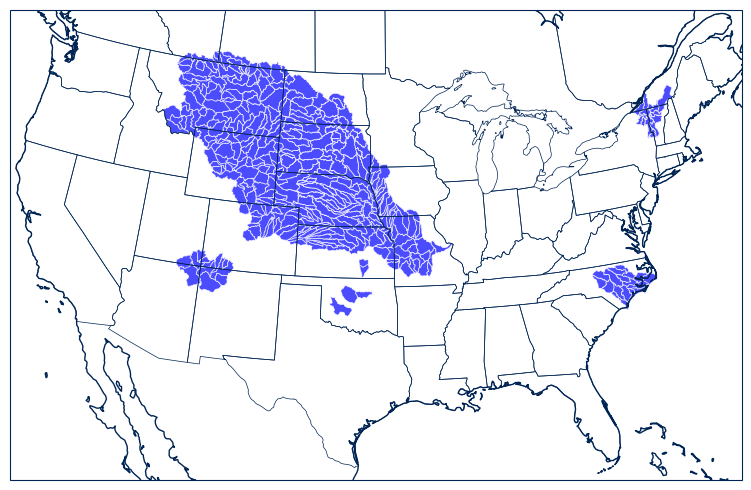

Timing = 95.14787888526917 s;  1.5857979814211527 m
----


In [23]:
####################################################
#
# Produce HUC Image
#

print("Produce HUC Image")

t0 = time.time()

ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("USGS HUC-08 Basins", color = Mines_Blue, fontsize= 'x-large')

ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)


#ax.set_frame_on(False)

shp_hucs.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "Blue",
              edgecolor = 'white', 
              alpha     = 0.7,
              transform = ccrs.PlateCarree(),
              linewidth = .5)
plt.tight_layout()
plt.savefig(target_dir + "./LOCA2_HUCs_Available_Regions_Map.png")
if (display_img) :
    plt.show()

t1 = time.time()

print("Timing =",(t1-t0), "s; ", ((t1-t0)/60.), "m")

print("----")

#
####################################################

## Produce ClimDiv Image

Produce ClimDiv Image


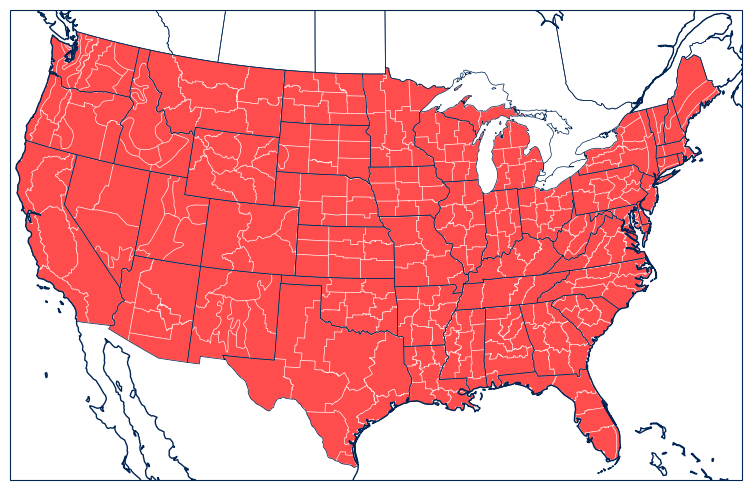

Timing = 73.9882230758667 s;  1.233137051264445 m
----


In [24]:
####################################################
#
# Produce ClimDiv Image
#

print("Produce ClimDiv Image")

t0 = time.time()

ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("NCEI State Climate Divisions", color = Mines_Blue, fontsize= 'x-large')
ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)

#ax.set_frame_on(False)

shp_cdiv.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "red",
              edgecolor = 'white',
              alpha     = 0.7,
              transform = ccrs.PlateCarree(),
              linewidth = .5)

plt.tight_layout()
plt.savefig(target_dir + "./LOCA2_ClimDiv_Available_Regions_Map.png")
if (display_img) :
    plt.show()
    
t1 = time.time()

print("Timing =",(t1-t0), "s; ", ((t1-t0)/60.), "m")

print("----")

#
####################################################

## Produce Combined ClimDiv + HUC Image

Produce Combined ClimDiv + HUC Image


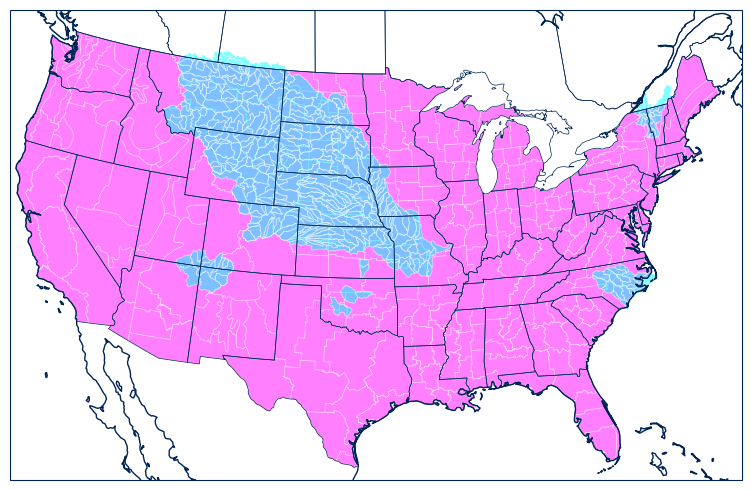

Timing = 165.23835492134094 s;  2.753972582022349 m
----
WE'RE OUTTA HERE LIKE VLADIMIR!
Timing = 7036.281759023666 s;  117.27136265039444 m
====


In [25]:
####################################################
#
# Produce Combined ClimDiv + HUC Image
#

print("Produce Combined ClimDiv + HUC Image")

t0 = time.time()

ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("NCEI State Climate Divisions", color = Mines_Blue, fontsize= 'x-large')
ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)

#ax.set_frame_on(False)

shp_cdiv.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "magenta",
              edgecolor = 'white', 
              alpha     = 0.5,
              transform = ccrs.PlateCarree(),
              linewidth = .5)

shp_hucs.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "cyan",
              edgecolor = 'white', 
              alpha     = 0.5,
              transform = ccrs.PlateCarree(),
              linewidth = .5)
plt.tight_layout()
plt.savefig(target_dir + "./LOCA2_Available_Regions_Map.png")
if (display_img) :
    plt.show()

t1 = time.time()

print("Timing =",(t1-t0), "s; ", ((t1-t0)/60.), "m")

print("----")

print("WE'RE OUTTA HERE LIKE VLADIMIR!")

print("Timing =",(t1-t_00), "s; ", ((t1-t_00)/60.), "m")

print("====")

#
####################################################

In [16]:
shp_cdiv.to_file('Available_ClimDiv_Files.shp') 
shp_hucs.to_file('Available_HUC-08_Files.shp') 

In [17]:
shp_hucs

,huc8,geometry
0,1,"POLYGON ((-107.06413 44.15078, -107.06297 44.1..."
1,1,"POLYGON ((-106.03158 44.86487, -106.03139 44.8..."
2,1,"POLYGON ((-106.26834 44.57113, -106.26739 44.5..."
3,1,"POLYGON ((-104.33155 44.18989, -104.33096 44.1..."
4,1,"POLYGON ((-104.36247 49.24502, -104.36162 49.2..."
...,...,...
2052,1,"POLYGON ((-73.07006 44.59122, -73.06981 44.590..."
2053,1,"POLYGON ((-71.19162 46.11583, -71.1917 46.1145..."
2069,1,"POLYGON ((-73.40306 45.39731, -73.40289 45.395..."
2093,1,"POLYGON ((-73.31087 44.21875, -73.30956 44.218..."
